In [1]:
import pandas as pd    # Data Manipulation
import matplotlib.pyplot as plt  # Data Visualisation
from scipy import stats  # a module from Scipy liabrary which provides function for statistic
import numpy as np       # It is used for nummerical calculations
import seaborn as sns  

In [3]:
data = pd.read_csv('E:/Data analyst task/retail_sales_dataset.csv')
print(data)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

In [5]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [11]:
data.shape

(1000, 9)

In [13]:
data.describe

<bound method NDFrame.describe of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amou

In [15]:
data.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [19]:
data.count()

Transaction ID      1000
Date                1000
Customer ID         1000
Gender              1000
Age                 1000
Product Category    1000
Quantity            1000
Price per Unit      1000
Total Amount        1000
dtype: int64

In [21]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [25]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Quantity'] = data['Quantity'].astype(int) 
data['Price per Unit'] = data['Price per Unit'].astype(float)
data['Total Amount'] = data['Total Amount'].astype(float)

In [27]:
data.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int32
Price per Unit             float64
Total Amount               float64
dtype: object

In [33]:
data['Calculated Total'] = data['Quantity'] * data['Price per Unit']

In [37]:
data.drop_duplicates(inplace=True)

In [41]:
mode_quantity = data['Quantity'].mode()[0]
mode_price_per_unit = data['Price per Unit'].mode()[0]
mode_total_amount = data['Total Amount'].mode()[0]

# Calculate the standard deviation
std_quantity = data['Quantity'].std()
std_price_per_unit = data['Price per Unit'].std()
std_total_amount = data['Total Amount'].std()

# Displaying mean, median, mode, and standard deviation
print("Descriptive Statistics:")
print(f"Mean:\n{data[['Quantity', 'Price per Unit', 'Total Amount']].mean()}")
print(f"\nMedian:\n{data[['Quantity', 'Price per Unit', 'Total Amount']].median()}")
print(f"\nMode:\nQuantity: {mode_quantity}, Price per Unit: {mode_price_per_unit}, Total Amount: {mode_total_amount}")
print(f"\nStandard Deviation:\nQuantity: {std_quantity}, Price per Unit: {std_price_per_unit}, Total Amount: {std_total_amount}")

# Step 2: Unique values in Product Category and Gender
unique_product_categories = data['Product Category'].unique()
unique_genders = data['Gender'].unique()
print(f"\nUnique Product Categories: {unique_product_categories}")
print(f"Unique Genders: {unique_genders}")

# Step 3: Customer Analysis
num_unique_customers = data['Customer ID'].nunique()
avg_transactions_per_customer = data['Customer ID'].value_counts().mean()
print(f"\nNumber of Unique Customers: {num_unique_customers}")
print(f"Average Transactions per Customer: {avg_transactions_per_customer:.2f}")

Descriptive Statistics:
Mean:
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median:
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Mode:
Quantity: 4, Price per Unit: 50.0, Total Amount: 50.0

Standard Deviation:
Quantity: 1.1327343409145405, Price per Unit: 189.68135627129138, Total Amount: 559.997631555123

Unique Product Categories: ['Beauty' 'Clothing' 'Electronics']
Unique Genders: ['Male' 'Female']

Number of Unique Customers: 1000
Average Transactions per Customer: 1.00


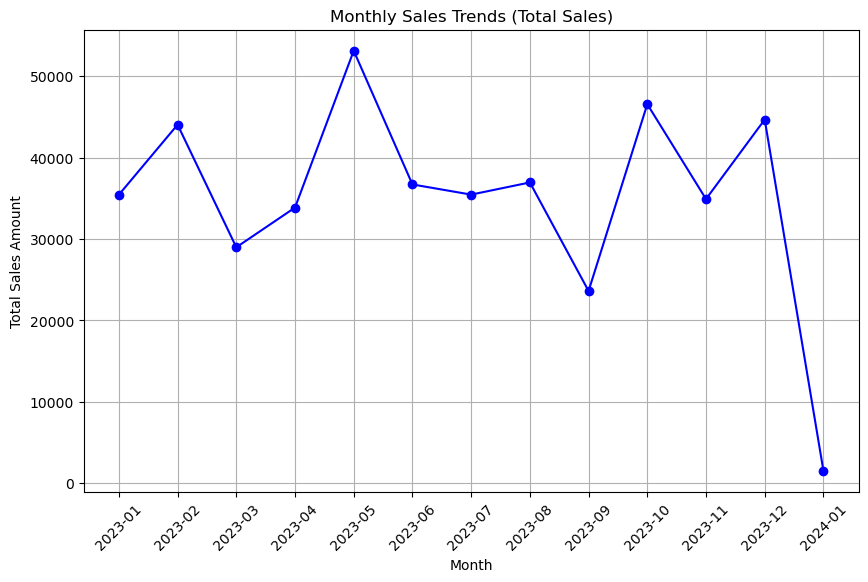

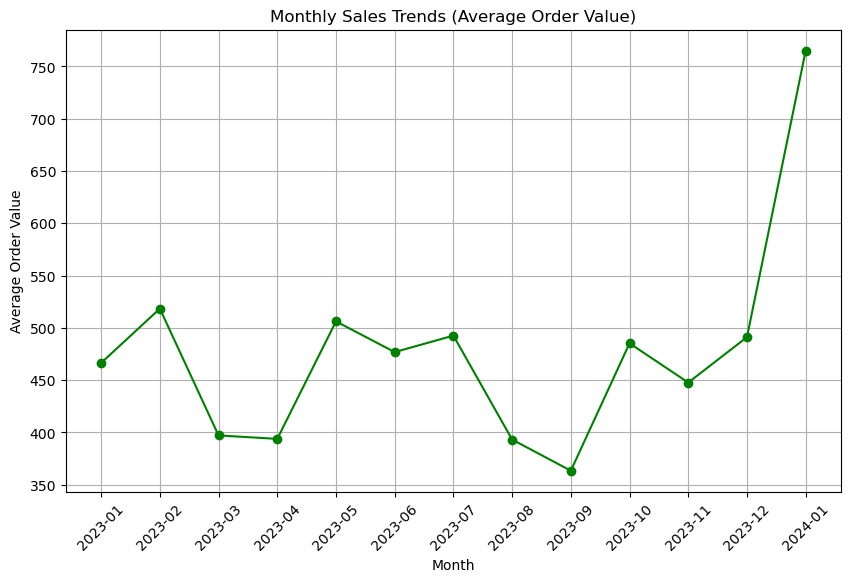


Monthly Sales Data:
   Year-Month  Total_Sales  Average_Order_Value
0     2023-01      35450.0           466.447368
1     2023-02      44060.0           518.352941
2     2023-03      28990.0           397.123288
3     2023-04      33870.0           393.837209
4     2023-05      53150.0           506.190476
5     2023-06      36715.0           476.818182
6     2023-07      35465.0           492.569444
7     2023-08      36960.0           393.191489
8     2023-09      23620.0           363.384615
9     2023-10      46580.0           485.208333
10    2023-11      34920.0           447.692308
11    2023-12      44690.0           491.098901
12    2024-01       1530.0           765.000000


In [45]:
# Step 2: Group sales by month to observe monthly trends
# Create a new column for Year-Month
data['Year-Month'] = data['Date'].dt.to_period('M')

# Calculate total sales amount and average order value by month
monthly_sales = data.groupby('Year-Month').agg(
    Total_Sales=('Total Amount', 'sum'),
    Average_Order_Value=('Total Amount', 'mean')
).reset_index()

# Step 3: Identify any seasonal patterns or trends
# Plot the monthly sales trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Year-Month'].astype(str), monthly_sales['Total_Sales'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trends (Total Sales)')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Plot the monthly average order value trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Year-Month'].astype(str), monthly_sales['Average_Order_Value'], marker='o', linestyle='-', color='g')
plt.title('Monthly Sales Trends (Average Order Value)')
plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#Display the summarized monthly sales data
print("\nMonthly Sales Data:")
print(monthly_sales)


Distribution of Customers by Gender:
Gender
Female    510
Male      490
Name: count, dtype: int64


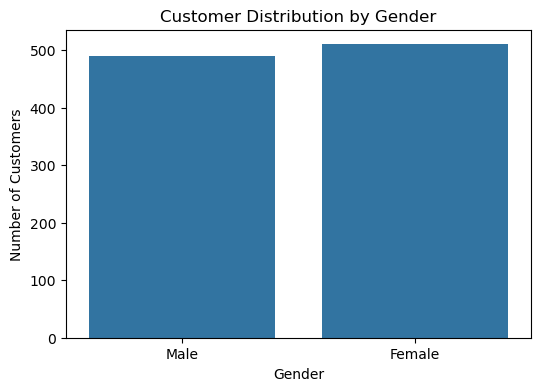

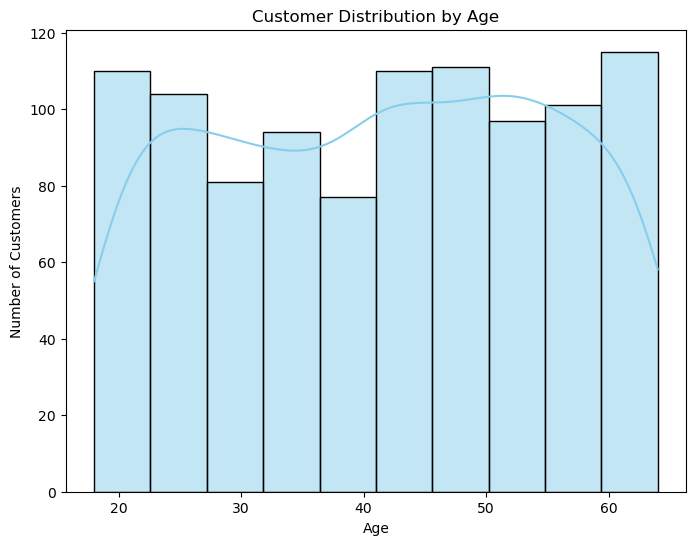

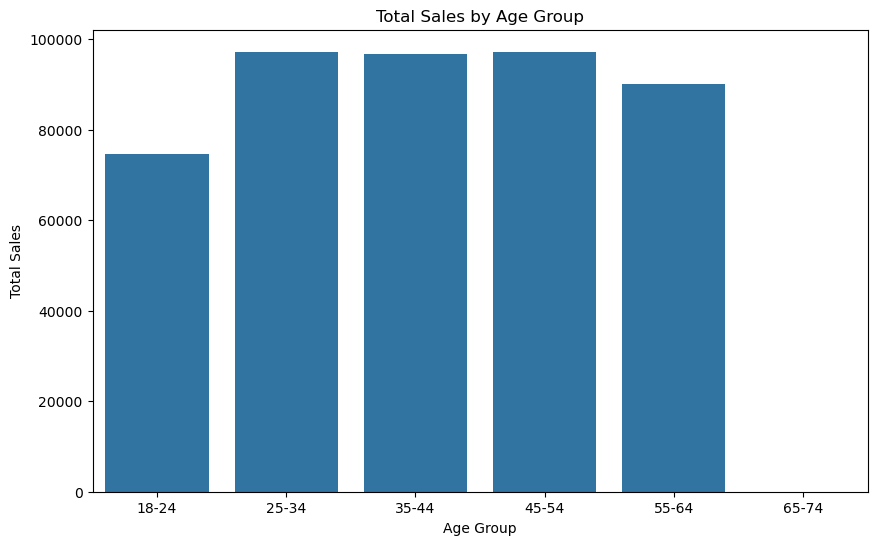


Purchasing Patterns by Age Group:
  Age Group  Total_Sales  Average_Sales  Customer_Count
0     18-24      74650.0     501.006711             149
1     25-34      97090.0     478.275862             203
2     35-44      96835.0     467.801932             207
3     45-54      97235.0     432.155556             225
4     55-64      90190.0     417.546296             216
5     65-74          0.0            NaN               0


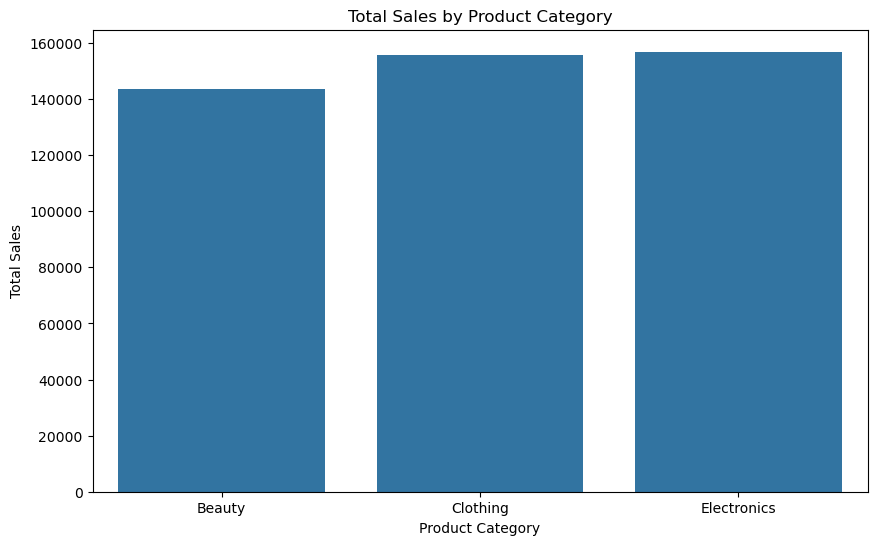


Sales by Product Category:
  Product Category  Total_Sales  Average_Sales  Customer_Count
0           Beauty     143515.0     467.475570             307
1         Clothing     155580.0     443.247863             351
2      Electronics     156905.0     458.786550             342

Best-Selling Product Category:
Product Category    Electronics
Total_Sales            156905.0
Average_Sales         458.78655
Customer_Count              342
Name: 2, dtype: object

Average Spending per Customer for Each Product Category:
  Product Category  Avg_Spending  Customer_Count
0           Beauty    467.475570             307
1         Clothing    443.247863             351
2      Electronics    458.786550             342


In [49]:
# 1.1. Analyze the distribution of customers by Gender
gender_counts = data['Gender'].value_counts()
print("\nDistribution of Customers by Gender:")
print(gender_counts)

# Plot the gender distribution (remove the palette parameter or set legend=False)
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

# 1.2. Analyze the distribution of customers by Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=10, kde=True, color='skyblue')
plt.title('Customer Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# 1.3. Segment customers based on age groups and analyze their purchasing patterns
age_bins = [18, 25, 35, 45, 55, 65, 75]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

age_group_sales = data.groupby('Age Group', observed=False).agg(
    Total_Sales=('Total Amount', 'sum'),
    Average_Sales=('Total Amount', 'mean'),
    Customer_Count=('Customer ID', 'nunique')
).reset_index()

# Plot sales distribution by age group (remove the palette parameter or set legend=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Total_Sales', data=age_group_sales)
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.show()

print("\nPurchasing Patterns by Age Group:")
print(age_group_sales)

# Step 2: Product Analysis

# 2.1. Analyze sales by Product Category
category_sales = data.groupby('Product Category').agg(
    Total_Sales=('Total Amount', 'sum'),
    Average_Sales=('Total Amount', 'mean'),
    Customer_Count=('Customer ID', 'nunique')
).reset_index()

# Plot sales by product category (remove the palette parameter or set legend=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total_Sales', data=category_sales)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

print("\nSales by Product Category:")
print(category_sales)

# 2.2. Identify best-selling products and categories
best_selling_category = category_sales.loc[category_sales['Total_Sales'].idxmax()]
print(f"\nBest-Selling Product Category:\n{best_selling_category}")

# 2.3. Calculate average spending per customer for each product category
avg_spending_per_customer = data.groupby('Product Category').agg(
    Avg_Spending=('Total Amount', 'mean'),
    Customer_Count=('Customer ID', 'nunique')
).reset_index()

print("\nAverage Spending per Customer for Each Product Category:")
print(avg_spending_per_customer)

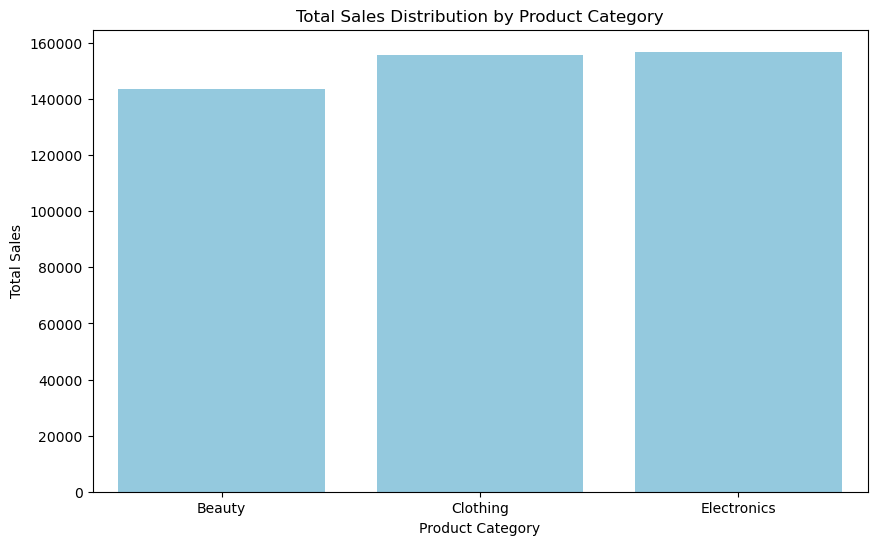

In [53]:
# Sales distribution by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=data, estimator=sum, errorbar=None, color='skyblue')
plt.title('Total Sales Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()


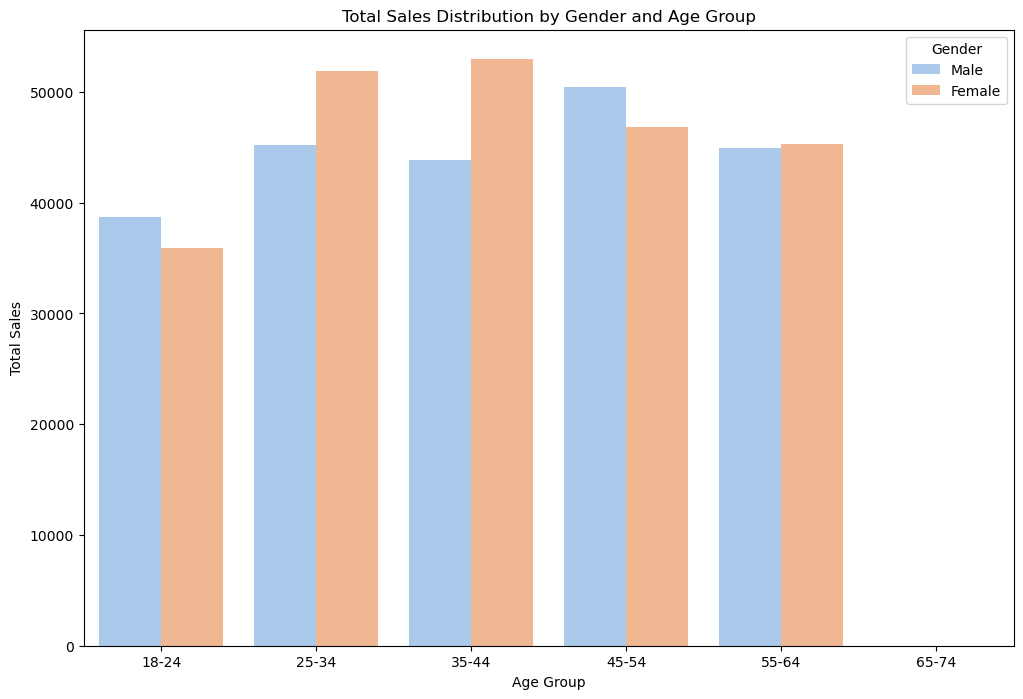

In [61]:
# Sales distribution by Gender and Age Group
plt.figure(figsize=(12, 8))
sns.barplot(x='Age Group', y='Total Amount', hue='Gender', data=data, estimator=sum, errorbar=None, palette='pastel')
plt.title('Total Sales Distribution by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.legend(title='Gender')
plt.show()


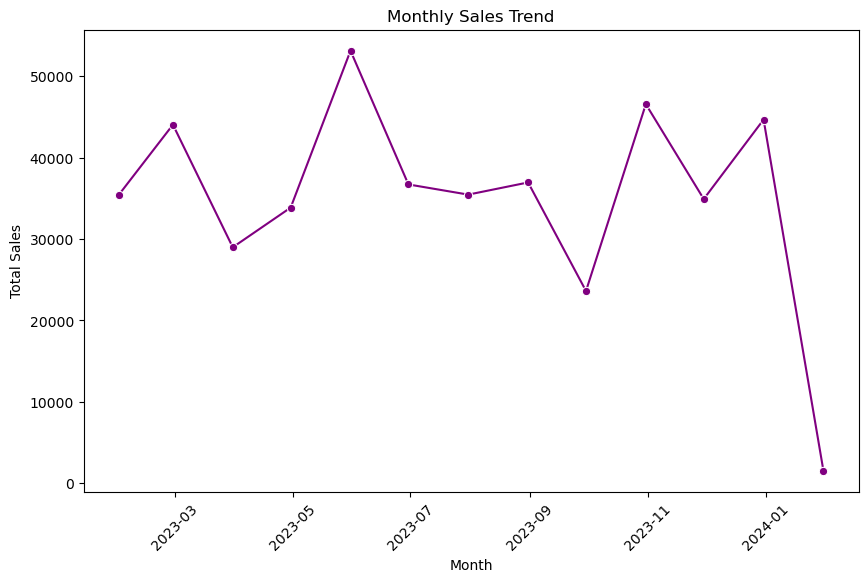

In [65]:
# Grouping sales data by month
monthly_sales = data.resample('ME', on='Date')['Total Amount'].sum().reset_index()

# Plotting monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Total Amount', data=monthly_sales, marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

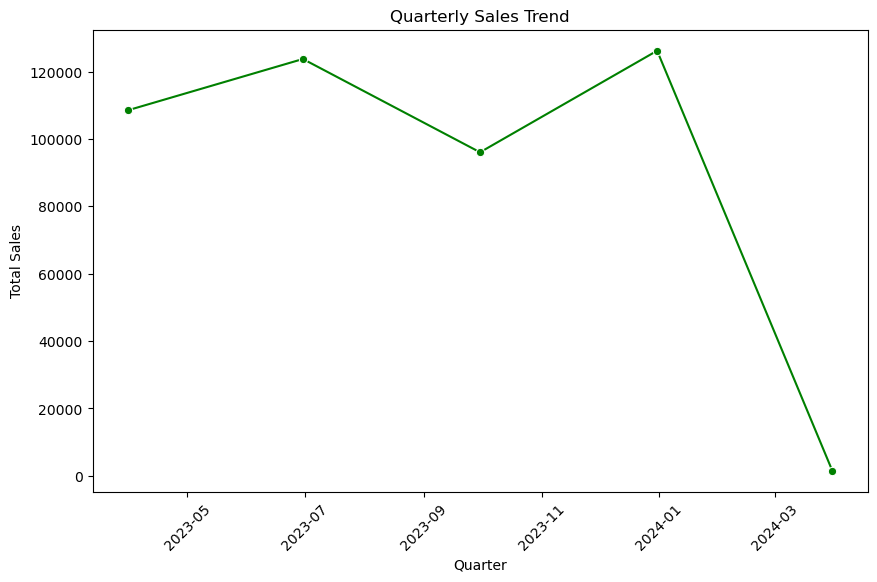

In [69]:
# Grouping sales data by quarter
quarterly_sales = data.resample('QE', on='Date')['Total Amount'].sum().reset_index()

# Plotting quarterly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Total Amount', data=quarterly_sales, marker='o', color='green')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


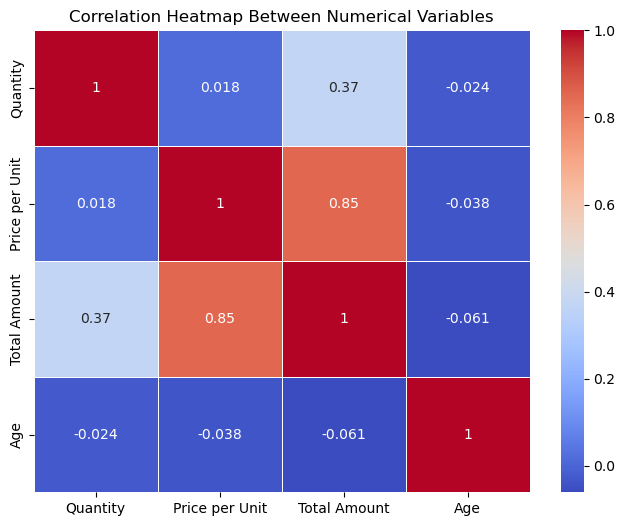

In [71]:
# Calculate correlation matrix
correlation_matrix = data[['Quantity', 'Price per Unit', 'Total Amount', 'Age']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Between Numerical Variables')
plt.show()


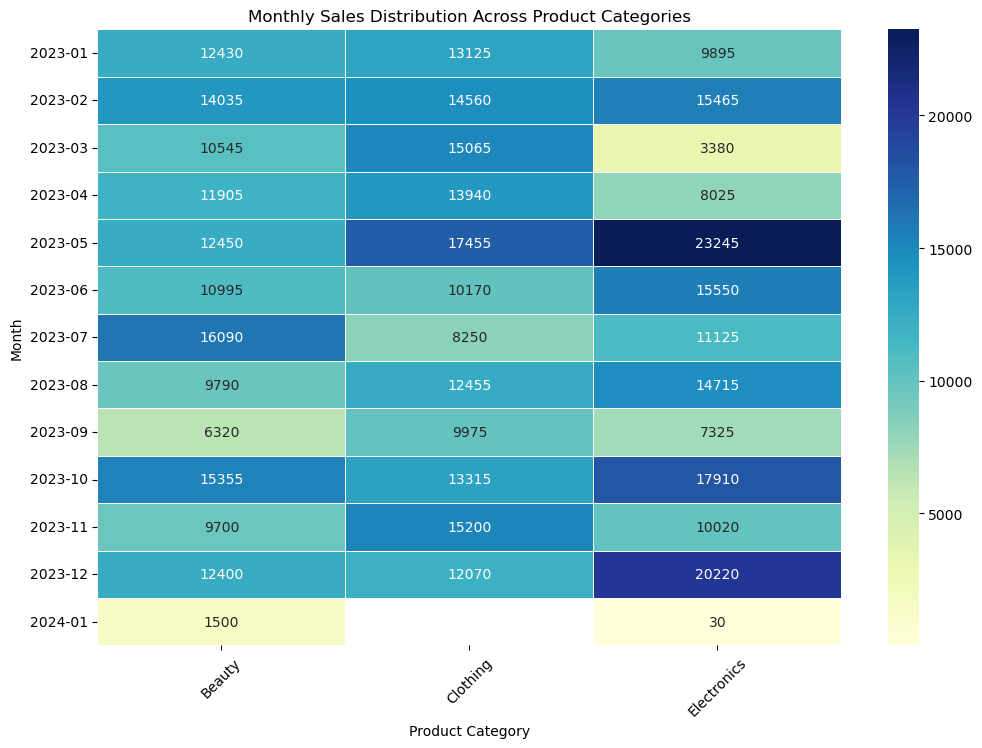

In [73]:
# Pivot table for monthly sales distribution across different product categories
monthly_category_sales = data.pivot_table(index=data['Date'].dt.strftime('%Y-%m'), 
                                        columns='Product Category', 
                                        values='Total Amount', 
                                        aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_category_sales, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Monthly Sales Distribution Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.show()


Recommendations Based on Analysis
1. Target Potential Customer Segments
   
    1. High-Spending Age Groups:

      Age Group 35-44: This group shows higher spending patterns based on the total sales amount. Marketing campaigns should focus on products popular        with this age group, such as electronics and beauty products.
   
      Gender-Based Targeting:
      Male Customers: Significant contributors to sales, especially in categories like electronics. Consider promotions for high-end electronics and          gadgets.
   
      Female Customers: Tend to purchase more in beauty and clothing categories. Consider seasonal offers, loyalty programs, and targeted ads for these       categories.
   
    2. Expand Age-Based Product Recommendations:

      For younger customers (18-24): Consider offering trendy and affordable product lines in electronics and clothing.
      For older customers (55-64): Offer promotions on high-value products such as electronics and premium clothing.
   
3. Highlight Most Profitable Product Categories
   
    1. Top Performing Categories:

        Electronics: Highest total sales value. Continue to focus on this category by offering bundled deals, extended warranties, and exclusive                launches.
        Clothing: High sales but with varying performance across age groups. Promote premium clothing lines to high-spending age groups.
       
    2. Product Bundling and Upselling:

       Bundle electronics with related accessories (e.g., phones with earphones or chargers) to increase average transaction value.
       Upsell premium beauty products by offering discounts on complementary items.
       
4. Promotional Strategies for Low-Performing Categories
   
    1. Identify Low-Performing Products:

       Beauty Products: While it has moderate sales, it may benefit from targeted promotions, such as seasonal discounts, “Buy One Get One Free”               offers, or influencer partnerships.
       Clothing for Younger Males: This segment seems under-targeted. Consider creating trendy, budget-friendly lines to attract younger male customers.
       
    2. Time-Based Promotions:

       Quarterly and Seasonal Promotions: Sales tend to be higher in certain months. Offer discounts during lower sales months (e.g., February or              March) to boost sales. Use holiday seasons to promote gift items in beauty and clothing categories.
       
       Introduce Flash Sales or Limited-Time Offers: Particularly for low-performing product categories, create a sense of urgency.
       
5. Customer Retention Strategies
   
    1. Loyalty Programs:

       Implement a loyalty program where customers earn points for each purchase. Offer exclusive deals or early access to sales for loyal customers.
       
    2. Personalized Marketing:

       Use the data from high-spending age groups and gender segments to create personalized recommendations, newsletters, and targeted ads.
       
    4. Feedback Mechanism:

       Encourage customers to provide feedback on low-performing products and categories. Use this feedback to improve product offerings or modify             marketing strategies.
       
6. Optimize Product Mix and Inventory
   
    1. Stock Management:

       Ensure sufficient inventory for top-selling products, particularly during peak sales periods. Avoid overstocking low-performing products.
       
    2. Expand High-Performing Categories:

       Introduce new sub-categories or premium product lines within electronics and clothing to leverage existing demand.